In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings

# using k-means model

In [153]:
football_df = pd.read_csv('../data/cleaned-premier-onehot.csv')
X = football_df[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']]

scale the data so it is ready to be using for clustering

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### plot 2d

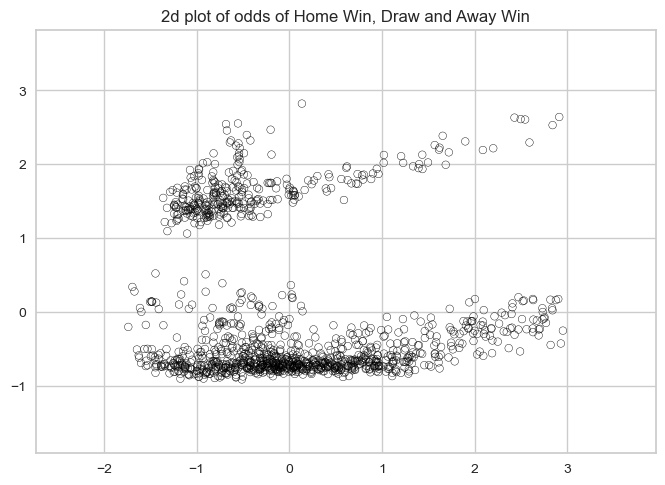

In [155]:
plt.figure()
plt.title('2d plot of odds of Home Win, Draw and Away Win')

x_min = X_scaled[:, 0].min()
x_max = X_scaled[:, 0].max()

y_min = X_scaled[:, 1].min()
y_max = X_scaled[:, 1].max()

# set plot limits
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# plot the points
plt.scatter(X_scaled[:,0], X_scaled[:,1], marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()

#### plot 3d

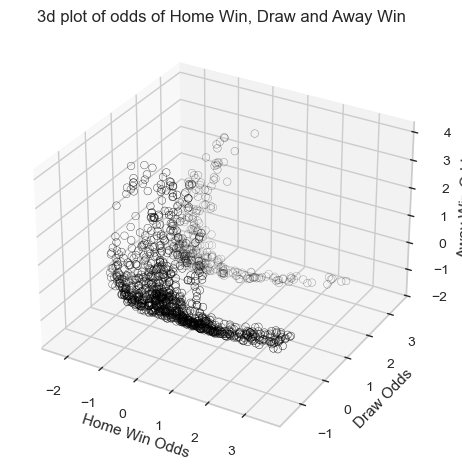

In [156]:
# create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3d plot of odds of Home Win, Draw and Away Win')

x_min = X_scaled[:, 0].min()
x_max = X_scaled[:, 0].max()
y_min = X_scaled[:, 1].min()
y_max = X_scaled[:, 1].max()
z_min = X_scaled[:, 2].min()
z_max = X_scaled[:, 2].max()

# set plot limits
ax.set_xlim(x_min - 1, x_max + 1)
ax.set_ylim(y_min - 1, y_max + 1)
ax.set_zlim(z_min - 1, z_max + 1)

# axis labels
ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')

# plot the points
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
           marker='o', facecolors='none', edgecolors='black', s=30)

plt.show()


### use Elbow method to find K

In [157]:
#ignore the warning about memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

#cluster range
distortions = []
K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    model.fit(X_scaled)
    distortions.append(
        sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0]
    )

print("Distortion:", distortions)

Distortion: [1.221609019061323, 0.961762526601313, 0.797441155499938, 0.7177516079286627, 0.6428843097747479, 0.5864256956514223, 0.5342836683057582, 0.48611951388847585]


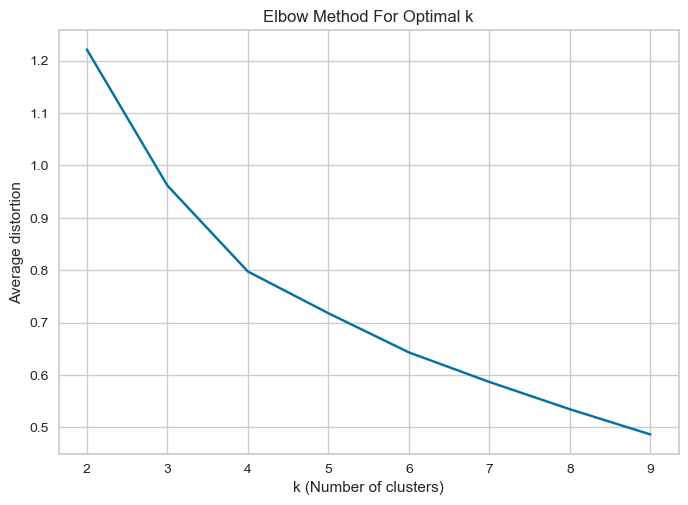

In [158]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Average distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


### optimal number of cluster based on elbow method

In [159]:
num_clusters = 4

In [160]:
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [161]:
# Train the KMeans clustering model
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=20)

### Use the silhouette score to find K

In [162]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X_scaled)
    score = metrics.silhouette_score(X_scaled, model.labels_, metric='euclidean', sample_size=len(X_scaled))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)
    
    best_k = K[np.argmax(scores)]
# print for spacing
print()
print("Best k based on silhouette score:", best_k)
    


Number of clusters = 2
Silhouette score = 0.42152352455967573

Number of clusters = 3
Silhouette score = 0.4188182306132723

Number of clusters = 4
Silhouette score = 0.4672022182395738

Number of clusters = 5
Silhouette score = 0.4215753967043436

Number of clusters = 6
Silhouette score = 0.43490314024228593

Number of clusters = 7
Silhouette score = 0.4369256210591314

Number of clusters = 8
Silhouette score = 0.44090573595055693

Number of clusters = 9
Silhouette score = 0.4361817853156493

Best k based on silhouette score: 4


### plot the silhouette score for best K

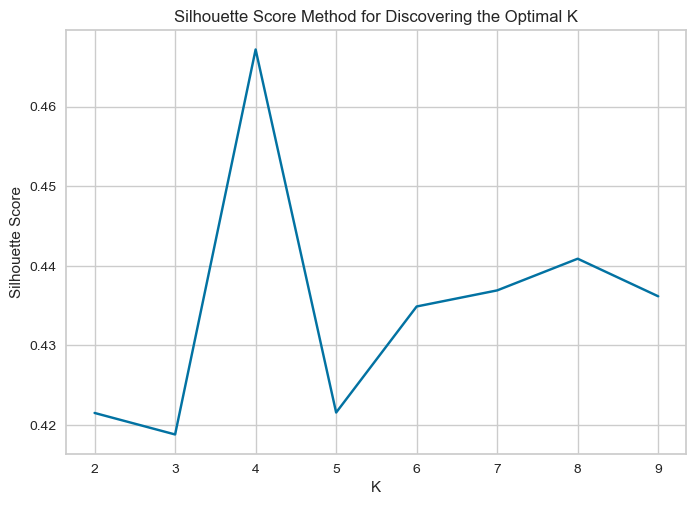

In [163]:
# find the best k with 
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

optimal number of cluster after using both elbow and silhouette method

### Implement the model for Prediction

In [164]:
# Predict 4 clusters in X
y = kmeans.predict(X_scaled)
y

array([1, 0, 1, ..., 0, 3, 3])

##### setup consistent colouring scheme

In [165]:
# Set up consistent colors
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(num_clusters)]

#### 3d plot of each cluster

Cluster 0: (152, 3)


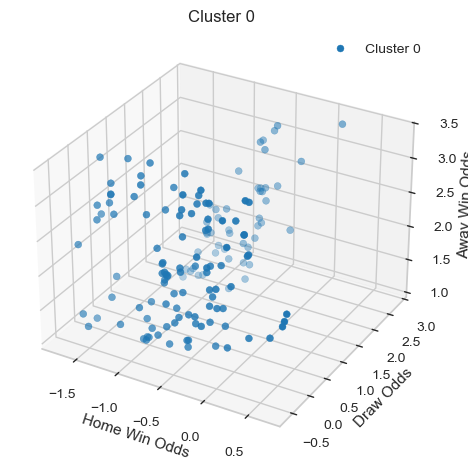

Cluster 1: (533, 3)


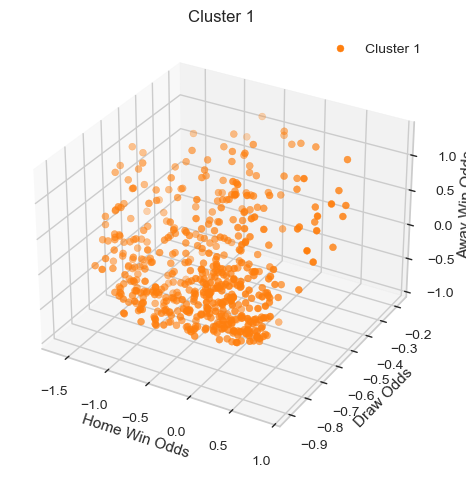

Cluster 2: (296, 3)


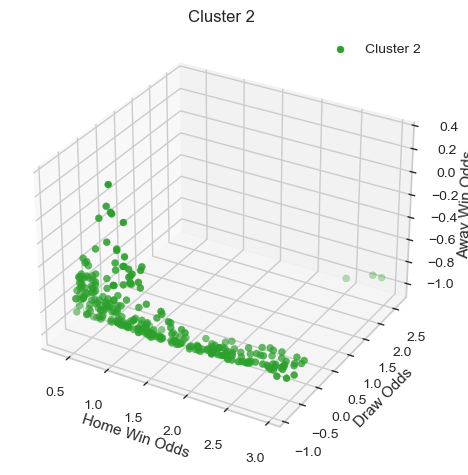

Cluster 3: (265, 3)


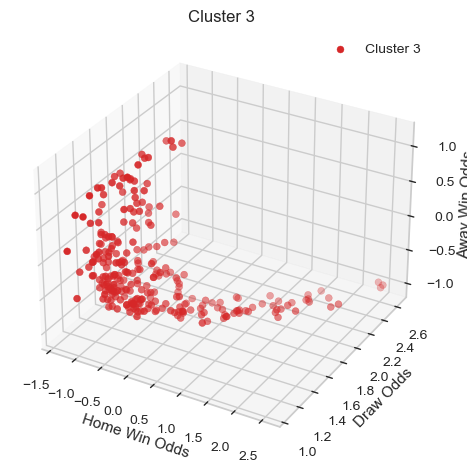

In [166]:
for i in range(num_clusters):
    cluster = X_scaled[y == i]
    print(f"Cluster {i}: {cluster.shape}")

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f"Cluster {i}")

    ax.set_xlabel('Home Win Odds')
    ax.set_ylabel('Draw Odds')
    ax.set_zlabel('Away Win Odds')
    ax.set_title(f'Cluster {i}')
    ax.legend()
    plt.grid(True)
    plt.show()

### 2d plot for the clusters

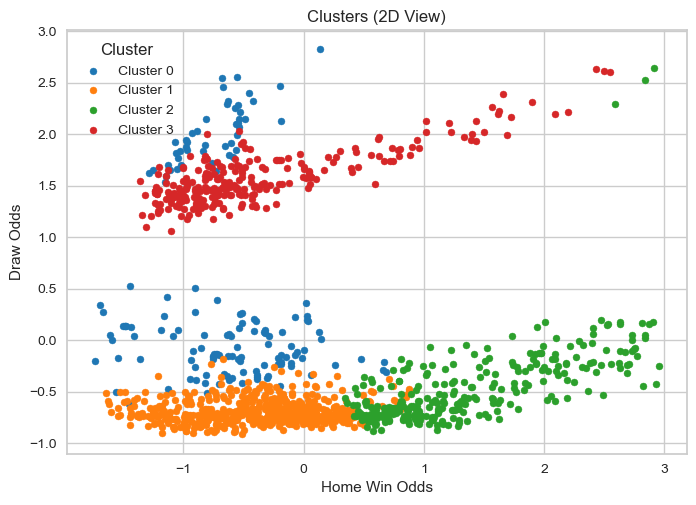

In [167]:
for i in range(num_clusters):
    cluster = X_scaled[y == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], 
                color=colors[i], s=25, label=f"Cluster {i}")

plt.xlabel('Home Win Odds')
plt.ylabel('Draw Odds')
plt.title('Clusters (2D View)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

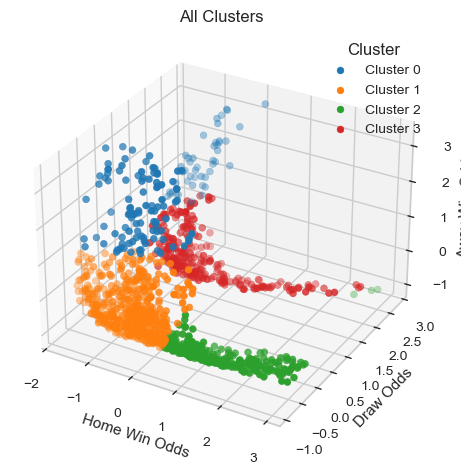

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster = X_scaled[y == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f"Cluster {i}")

ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')
ax.set_title('All Clusters')
ax.legend(title="Cluster")
plt.grid(True)
plt.show()


cluster centers

In [169]:
print(kmeans.cluster_centers_)

[[-0.64878807  0.56201882  2.17916119]
 [-0.37557788 -0.68934585  0.00977237]
 [ 1.36514549 -0.45804168 -0.78719555]
 [-0.39729913  1.57575402 -0.39030676]]


## validate the model

In [170]:
#%pip install yellowbrick

In [171]:
from yellowbrick.cluster import SilhouetteVisualizer

In [172]:
features = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

In [173]:
k = 4
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X_scaled)

array([0, 3, 0, ..., 3, 2, 2])

#### Silhouette Score

In [174]:
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.467


#### plot the silhouette score with the correct colour scheme

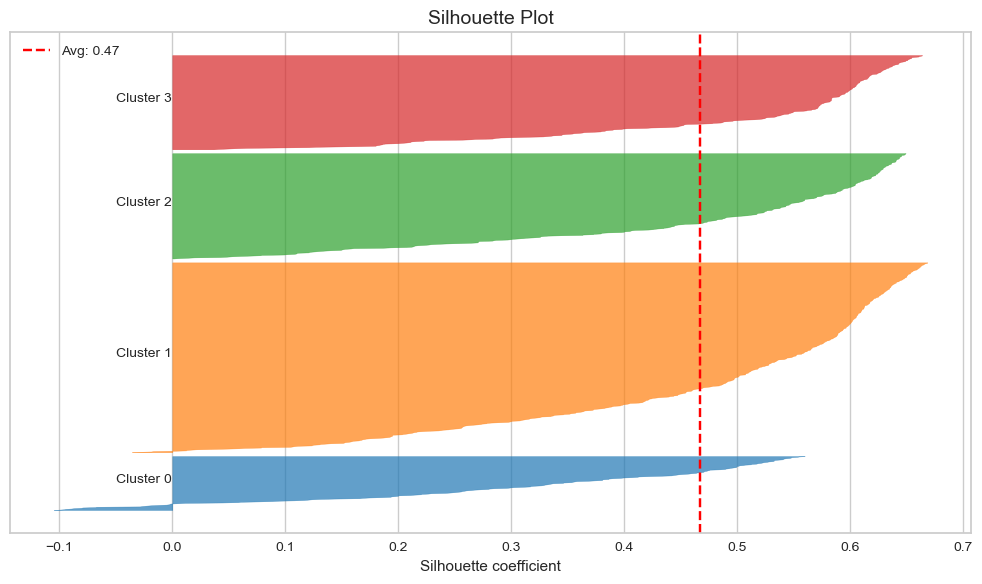

In [175]:
sample_silhouette_values = silhouette_samples(X_scaled, y)
overall_score = silhouette_score(X_scaled, y)

fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10

for i in range(num_clusters):
    values = sample_silhouette_values[y == i]
    values.sort()
    size = len(values)
    y_upper = y_lower + size

    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        values,
        facecolor=colors[i],
        edgecolor=colors[i],
        alpha=0.7
    )

    ax.text(-0.05, y_lower + 0.5 * size, f"Cluster {i}", fontsize=10)
    y_lower = y_upper + 10

ax.axvline(overall_score, color="red", linestyle="--", label=f"Avg: {overall_score:.2f}")

ax.set_title("Silhouette Plot", fontsize=14)
ax.set_xlabel("Silhouette coefficient")
ax.set_yticks([])
ax.legend()
plt.tight_layout()
plt.show()

#### save model

In [178]:
import joblib
joblib.dump(kmeans, '../Models/k-means-model.pkl')

['../Models/k-means-model.pkl']

## Try to analyzing each cluster

In [179]:
football_df['cluster'] = y

In [180]:
cluster_summary = football_df.groupby('cluster')[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']].mean()
display(cluster_summary)

,avg_odd_home_win,avg_odd_draw,avg_odd_away_win
cluster,,,
0,6.597816,5.367026,7.179941
1,6.882916,3.306223,3.700368
2,8.699392,3.687145,2.422078
3,6.860249,7.036491,3.058664


In [181]:
football_df['cluster'].value_counts().sort_index()


cluster
0    152
1    533
2    296
3    265
Name: count, dtype: int64

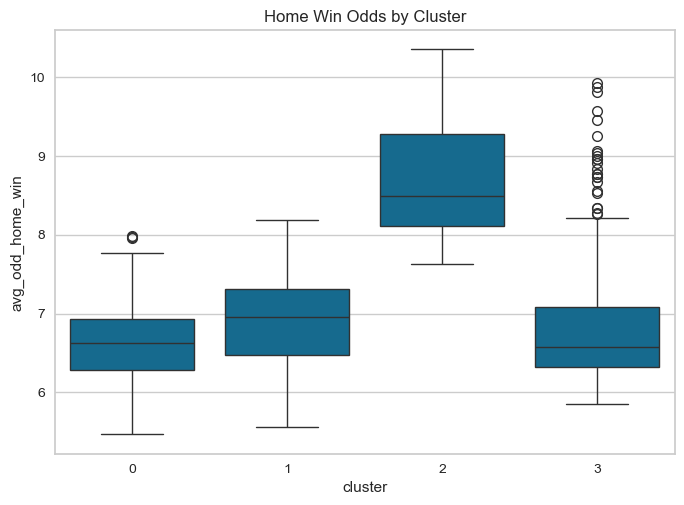

In [182]:
sns.boxplot(data=football_df, x='cluster', y='avg_odd_home_win')
plt.title("Home Win Odds by Cluster")
plt.show()


In [189]:
columns_to_describe = [
    "home_outcome_D",
    "home_outcome_L",
    "home_outcome_W",
    "avg_odd_home_win",
    "avg_odd_draw",
    "avg_odd_away_win",
    "home_ranking",
    "away_ranking",
]

for i in range(num_clusters):
    print(f"Cluster {i}")
    display(football_df[football_df["cluster"] == i][columns_to_describe].describe())


Cluster 0


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.197368,0.125000,0.677632,6.597816,5.367026,7.179941,5.078947,13.131579
std,0.399328,0.331812,0.468928,0.509695,1.651194,1.040559,3.793557,4.523206
min,0.000000,0.000000,0.000000,5.463000,3.427000,5.438000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,6.284000,4.141500,6.356250,2.000000,10.000000
50%,0.000000,0.000000,1.000000,6.627500,4.574000,7.101500,5.000000,13.000000
75%,0.000000,0.000000,1.000000,6.932500,7.251000,8.130250,6.000000,17.000000
max,1.000000,1.000000,1.000000,7.989000,9.088000,9.057000,20.000000,20.000000


Cluster 1


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,0.292683,0.228893,0.478424,6.882916,3.306223,3.700368,11.238274,11.941839
std,0.455422,0.420515,0.500004,0.566524,0.188312,0.816514,5.352383,5.365091
min,0.000000,0.000000,0.000000,5.560000,2.935000,2.219000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,6.468000,3.185000,3.049000,7.000000,8.000000
50%,0.000000,0.000000,0.000000,6.955000,3.266000,3.558000,11.000000,12.000000
75%,1.000000,0.000000,1.000000,7.307000,3.395000,4.193000,16.000000,17.000000
max,1.000000,1.000000,1.000000,8.191000,4.138000,5.782000,20.000000,20.000000


Cluster 2


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.266892,0.466216,0.266892,8.699392,3.687145,2.422078,12.945946,6.581081
std,0.443084,0.499702,0.443084,0.737482,0.660973,0.401964,4.977623,4.825095
min,0.000000,0.000000,0.000000,7.629000,2.990000,2.040000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,8.107500,3.269250,2.113750,9.000000,3.000000
50%,0.000000,0.000000,0.000000,8.489500,3.481500,2.263000,13.000000,5.000000
75%,1.000000,1.000000,1.000000,9.281750,4.007000,2.623250,17.000000,9.250000
max,1.000000,1.000000,1.000000,10.355000,8.790000,4.213000,20.000000,20.000000


Cluster 3


,home_outcome_D,home_outcome_L,home_outcome_W,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,0.215094,0.377358,0.407547,6.860249,7.036491,3.058664,12.283019,10.256604
std,0.411665,0.485643,0.492308,0.845240,0.434012,0.885136,5.010509,5.571352
min,0.000000,0.000000,0.000000,5.856000,6.189000,2.005000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,6.318000,6.755000,2.342000,9.000000,5.000000
50%,0.000000,0.000000,0.000000,6.574000,6.939000,2.811000,12.000000,10.000000
75%,0.000000,1.000000,1.000000,7.084000,7.232000,3.553000,16.000000,15.000000
max,1.000000,1.000000,1.000000,9.930000,8.775000,5.565000,20.000000,20.000000


### 🧠 Cluster Summary

| Cluster | Label                          | Characteristics                                                                 |
|--------:|--------------------------------|----------------------------------------------------------------------------------|
| **0**   | 🟦 Dominant home team          | - Very low away win odds (avg 7.18)<br>- Draws are relatively unlikely (avg 5.37)<br>- Home team is much stronger (avg rank 5.1 vs. 13.1)|
| **1**   | 🟧 Balanced / mild home favorite | - Most common type (533 matches)<br>- Home win odds are moderate (avg 6.88)<br>- Teams are fairly evenly matched (rank ~11 vs ~12)<br>- Slight home edge
| **2**   | 🟩 Strong away favorite         | - Home has high odds to win (avg 8.70)<br>- Away team has low odds (avg 2.42)<br>- Home team is weaker (avg rank 12.9 vs. 6.6)<br>- Betting market clearly favors the away team |
| **3**   | 🟥 Uncertain / away-lean match | - Draw odds are very high (avg 7.04)<br>- Away win is moderately likely (avg 3.06)<br>- Rankings suggest slightly better away team<br>- Betting market is unclear possible away upset |


#### plot update with new labels

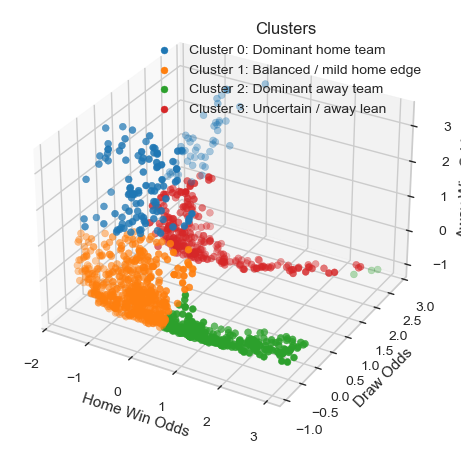

In [190]:
cluster_labels = {
    0: "Dominant home team",
    1: "Balanced / mild home edge",
    2: "Dominant away team",
    3: "Uncertain / away lean"
}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster = X_scaled[y == i]
    ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], 
               color=colors[i], s=25, label=f'Cluster {i}: {cluster_labels[i]}')

ax.set_xlabel('Home Win Odds')
ax.set_ylabel('Draw Odds')
ax.set_zlabel('Away Win Odds')

ax.legend(title="Clusters")
plt.grid(True)
plt.show()
